In [1]:
#featureEngineeringAnalysis.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from common import (
    load_data, feature_engineering
)

In [2]:
# Load the cryptocurrency data
file_path = 'BTC.csv'  # Change the file path as needed
data = load_data(file_path)

/Users/pasangchoteensherpa/Downloads/Crypto Time Series Analysis/common.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(file_path, index_col=[1], parse_dates=[1],


In [3]:
# Feature Engineering
data = feature_engineering(data)

,Crypto,Open,High,Low,Close,lag1,lag2,lag3,MA3,MA4,MA5,max_3,day,month,year,day_of_week,quarter
Date,,,,,,,,,,,,,,,,,
2019-12-27,BTC,7208.0,7267.0,7087.0,7235.0,7334.0,7402.0,7254.0,7323.666667,7306.25,7279.2,7402.0,27,12,2019,4,4
2019-12-26,BTC,7218.0,7437.0,7179.0,7208.0,7235.0,7334.0,7402.0,7259.000000,7294.75,7286.6,7334.0,26,12,2019,3,4
2019-12-25,BTC,7255.0,7268.0,7130.0,7214.0,7208.0,7235.0,7334.0,7219.000000,7247.75,7278.6,7235.0,25,12,2019,2,4
2019-12-24,BTC,7328.0,7417.0,7168.0,7255.0,7214.0,7208.0,7235.0,7225.666667,7228.00,7249.2,7255.0,24,12,2019,1,4
2019-12-23,BTC,7420.0,7696.0,7302.0,7328.0,7255.0,7214.0,7208.0,7265.666667,7251.25,7248.0,7328.0,23,12,2019,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,BTC,43114.0,43233.0,40769.0,41908.0,41786.0,42334.0,41705.0,42009.333333,41933.25,42083.8,42334.0,7,1,2022,4,1
2022-01-06,BTC,43658.0,43764.0,42529.0,43114.0,41908.0,41786.0,42334.0,42269.333333,42285.50,42169.4,43114.0,6,1,2022,3,1
2022-01-05,BTC,46298.0,46851.0,43522.0,43658.0,43114.0,41908.0,41786.0,42893.333333,42616.50,42560.0,43658.0,5,1,2022,2,1


In [10]:
import warnings
warnings.filterwarnings("ignore") #ignore warnings

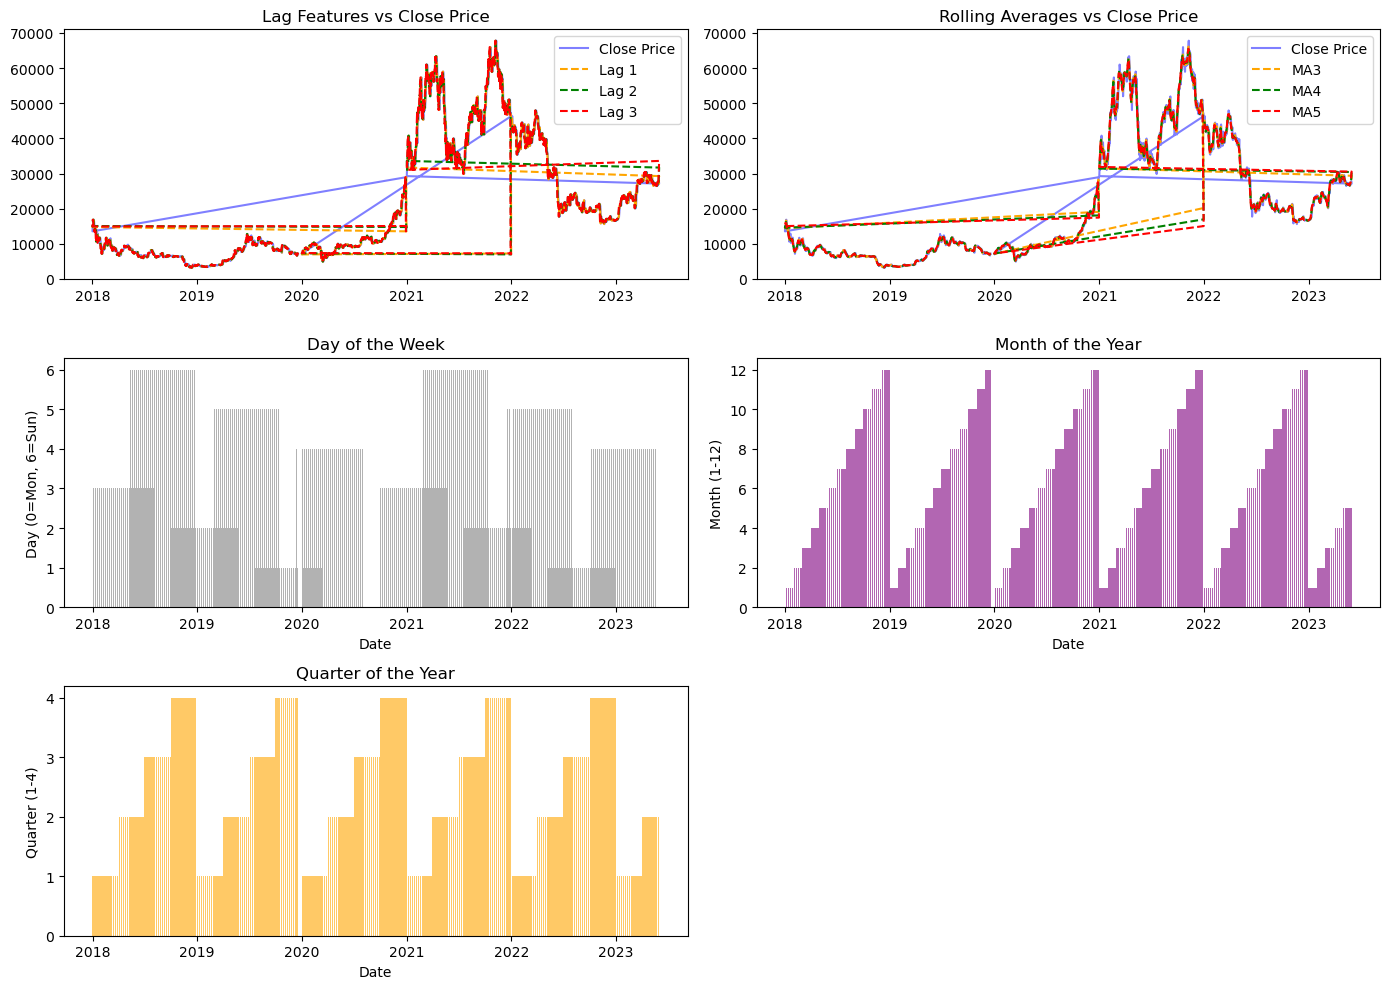

In [11]:
# Feature Engineering
data = feature_engineering(data)

# Plotting Lag Features
plt.figure(figsize=(14, 10))

# Lag Features
plt.subplot(3, 2, 1)
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data['lag1'], label='Lag 1', color='orange', linestyle='--')
plt.plot(data['lag2'], label='Lag 2', color='green', linestyle='--')
plt.plot(data['lag3'], label='Lag 3', color='red', linestyle='--')
plt.title('Lag Features vs Close Price')
plt.legend()

# Rolling Statistics
plt.subplot(3, 2, 2)
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data['MA3'], label='MA3', color='orange', linestyle='--')
plt.plot(data['MA4'], label='MA4', color='green', linestyle='--')
plt.plot(data['MA5'], label='MA5', color='red', linestyle='--')
plt.title('Rolling Averages vs Close Price')
plt.legend()

# Time-Based Features
plt.subplot(3, 2, 3)
data['day_of_week'] = data.index.dayofweek
plt.bar(data.index, data['day_of_week'], color='gray', alpha=0.6)
plt.title('Day of the Week')
plt.xlabel('Date')
plt.ylabel('Day (0=Mon, 6=Sun)')

plt.subplot(3, 2, 4)
data['month'] = data.index.month
plt.bar(data.index, data['month'], color='purple', alpha=0.6)
plt.title('Month of the Year')
plt.xlabel('Date')
plt.ylabel('Month (1-12)')

plt.subplot(3, 2, 5)
data['quarter'] = data.index.quarter
plt.bar(data.index, data['quarter'], color='orange', alpha=0.6)
plt.title('Quarter of the Year')
plt.xlabel('Date')
plt.ylabel('Quarter (1-4)')

plt.tight_layout()
plt.show()

In [5]:
# Define the target variable (Close Price) and the features (Lag, Rolling averages, Day/Month/Quarter)
X = data[['lag1', 'lag2', 'MA3', 'day_of_week', 'month', 'quarter']]
y = data['Close']

In [6]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
# Initialize the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 781014.5593593909
Root Mean Squared Error: 883.7502811085216


In [9]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_importances = sorted(zip(importances, feature_names), reverse=True)
print("Feature Importances: ", sorted_importances)

Feature Importances:  [(0.5135950659403693, 'MA3'), (0.4841577463779449, 'lag1'), (0.0019494883899959816, 'lag2'), (0.0001484456540163116, 'day_of_week'), (0.00010139523227700354, 'month'), (4.7858405396590295e-05, 'quarter')]
